# Week1 EDA - 15기 김태희


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지

## 1. 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dat = pd.read_csv("/content/drive/MyDrive/2021/투빅스 정규세션/Week1/week1_EDA/과제데이터.csv",parse_dates=['datetime'],index_col=0)
#datetime 변수 -> year-month-day-time 으로 구성되어 있음 
#parse_dates 활용해 parsing 해서 읽어오기, 'datetime' column을 인덱스로 지정해서 읽어오기

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
dat.describe() # numeric variable에 대한 정보 출력

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
print('data shape : {}'.format(dat.shape))

data shape : (10886, 11)


## 2. 데이터 


In [7]:
dat.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
print(dat.columns.values) #Feature Name 출력

['season' 'holiday' 'workingday' 'weather' 'temp' 'atemp' 'humidity'
 'windspeed' 'casual' 'registered' 'count']


### Categorical 변수 Numerical로 변환
 


In [9]:
dat['year'] = dat.index.year 
dat['month'] = dat.index.month 
dat['day'] = dat.index.day
dat['weekday'] = dat.index.dayofweek
dat['hour'] = dat.index.hour 

dat.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


12개의 변수 중 'datetime' 유일하게 categorical

year-month-day-time 정보를 활용해 새로운 변수를 생성할 수 있다. 

데이터를 읽어올 때 parse_dates 를 활용해 날짜/시간 형태로 파싱해서 읽어온 것을 활용해, 'year', 'month', 'day', 'weekday', 'hour' 변수가 새로 생성된 것을 확인할 수 있다. 


### 결측치 확인

In [10]:
dat.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
weekday       0
hour          0
dtype: int64

In [11]:
dat.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
weekday       0
hour          0
dtype: int64

NA 값이 없는 것 확인

### 데이터 시각화

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


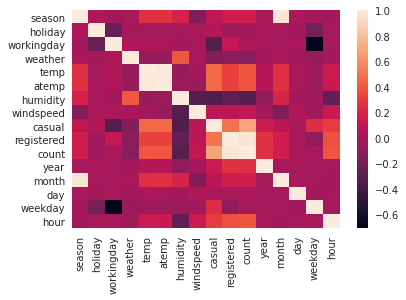

In [12]:
#변수들 간의 상관관계 
sns.heatmap(dat.corr())

날과 관련된 변수들 -> `season`과 `month`, 
온도와 관련된 변수들 -> `temp` 와 `atemp`이 상관관계가 높은 것을 알 수 있지만 이들에 가려져 사람들이 자전거를 대여하게 만드는, 렌탈 횟수와 상관관계가 높은 변수들을 파악하기 힘든 것을 확인할 수 있다. 



In [13]:
#자전거 렌탈 횟수와 다른 변수간의 상관관계 분석
count_corr = dat.corr()['count']
count_corr

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
weekday      -0.002283
hour          0.400601
Name: count, dtype: float64

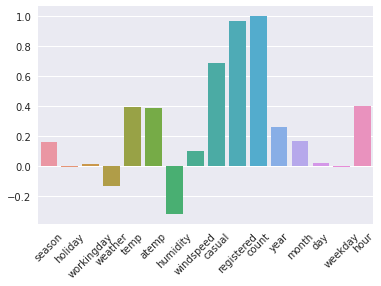

In [14]:
plt.xticks(rotation = 45)
sns.barplot(count_corr.index, count_corr.values)

`count`,`casual`,`registered` 를 제외한 다른 변수들과 총 렌탈 횟수간의 상관관계를 살펴보며 자전거 렌탈과 상관관계가 높은 변수들을 확인할 수 있다.

`temp`, `atemp`, `hour` 가 높은 상관관계를 보이고 `humidity`가 음의 상관관계를 보이는 것을 통해 낮 시간에, 온도가 높을수록, 습도가 낮을수록 자전거 렌탈 수요가 높아진다는 것을 파악할 수 있다.

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


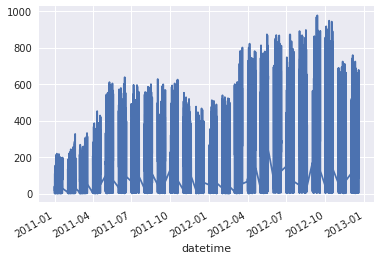

In [15]:
dat['count'].plot()

2011-1 부터 2012-12까지 일별 렌탈 숫자를 plot한 결과 매 월 마지막 즘의 렌탈 개수가 이상한 것을 확인할 수 있다. 

In [16]:
jan = dat['2011-01']['count'].to_frame()
jan

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2011-01-19 19:00:00,112
2011-01-19 20:00:00,76
2011-01-19 21:00:00,59


데이터를 확인한 결과, 각 월별 19일부터 월말까지의 데이터가 없는 것을 확인할 수 있다. 

In [17]:
np.unique(dat.weekday)

array([0, 1, 2, 3, 4, 5, 6])

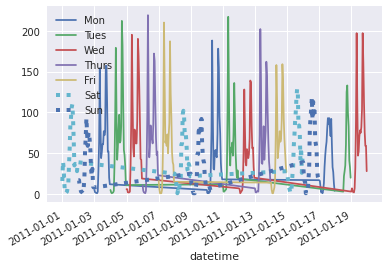

In [18]:
### 2011년 1월달 시간 별 렌탈 현황 -> 1월 19일 이후로 집계가 안 된 것을 확인할 수 있다. 

dat.loc[(dat.year==2011)&(dat.month==1)&(dat.weekday==0)]['count'].plot(label = 'Mon')
dat.loc[(dat.year==2011)&(dat.month==1)&(dat.weekday==1)]['count'].plot(label = 'Tues')
dat.loc[(dat.year==2011)&(dat.month==1)&(dat.weekday==2)]['count'].plot(label = 'Wed')
dat.loc[(dat.year==2011)&(dat.month==1)&(dat.weekday==3)]['count'].plot(label = 'Thurs')
dat.loc[(dat.year==2011)&(dat.month==1)&(dat.weekday==4)]['count'].plot(label = 'Fri')
dat.loc[(dat.year==2011)&(dat.month==1)&(dat.weekday==5)]['count'].plot(linewidth = 4, linestyle = ':', label = 'Sat')
dat.loc[(dat.year==2011)&(dat.month==1)&(dat.weekday==6)]['count'].plot(linewidth = 4, linestyle = ':', label = 'Sun')
plt.legend()
plt.show()

일별로 색을 달리하여 그래프를 그려 보았을 때 주말인 토요일, 일요일에는 렌탈 횟수가 주중에 비해 낮다는 것을 확인할 수 있다. 

In [19]:
## 1월달 평일 시간별 평균 렌탈 횟수

jan11_hr_weekday = dat[dat['weekday'].isin([0,1,2,3,4])].groupby(['hour'])
jan11_hr_weekday_avg = jan11_hr_weekday['count'].mean()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


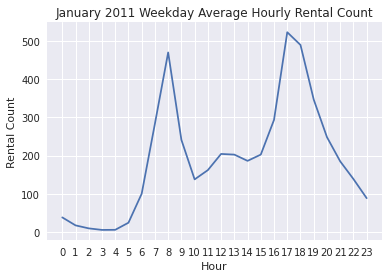

In [20]:
plt.plot(jan11_hr_weekday_avg.index,jan11_hr_weekday_avg)
plt.xlabel('Hour')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('January 2011 Weekday Average Hourly Rental Count')
plt.show()

오전 6시부터 10시까지, 오후 3시부터 저녁 9시까지 수요가 가장 많은 것을 확인할 수 있고, 점심시간에는 수요가 상대적으로 덜한 것을 확인할 수 있다. 

In [21]:
## 1월달 주말 시간별 평균 렌탈 횟수

jan11_hr_weekend = dat[dat['weekday'].isin([5,6])].groupby(['hour'])
jan11_hr_weekend_avg = jan11_hr_weekend['count'].mean()

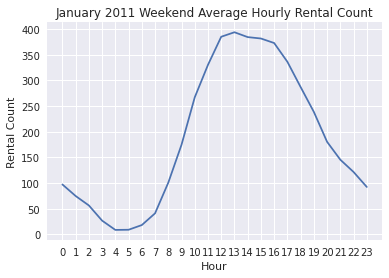

In [22]:
plt.plot(jan11_hr_weekend_avg.index,jan11_hr_weekend_avg)
plt.xlabel('Hour')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('January 2011 Weekend Average Hourly Rental Count')
plt.show()

주중과는 달리 오전부터 낮시간이 될 때 까지 렌탈 횟수가 증가하고, 오후 4시부터 감소하는 추세를 보이는 것을 확인할 수 있다. 


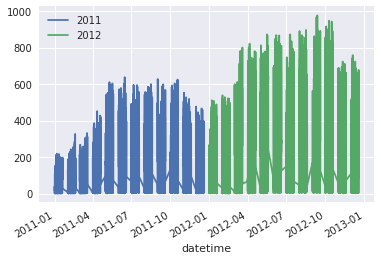

In [23]:
dat.loc[(dat.year==2011)]['count'].plot(label = '2011')
dat.loc[(dat.year==2012)]['count'].plot(label = '2012')
plt.legend()
plt.show()

2011년에 비해 2012년에 자전거 렌탈 횟수가 더 높아진 것을 확인할 수 있다. 

In [24]:
year_month = dat.groupby(['year','month'])
year_month_avg = year_month['count'].mean()

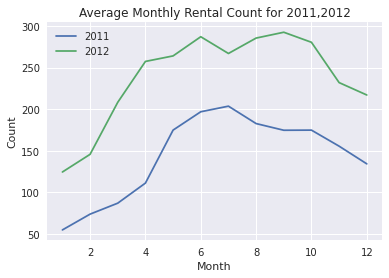

In [25]:
for year in year_month_avg.index.levels[0]:
    plt.plot(year_month_avg[year].index,year_month_avg[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rental Count for 2011,2012')
plt.show()

월별 평균 렌탈 횟수를 살펴본 결과, `teamp`와 `count`가 높은 상관관계를 보이는 만큼 날이 풀어지기 시작하는 4월부터 렌탈 횟수가 증가하기 시작해 10월부터 가을로 접어들면서 감소하기 시작하는 것을 파악할 수 있다. 

In [26]:
#주중 시간별 렌탈 횟수

year_hr = dat[dat['weekday'].isin([0,1,2,3,4])].groupby(['year','hour'])
year_hr_avg = year_hr['count'].mean()

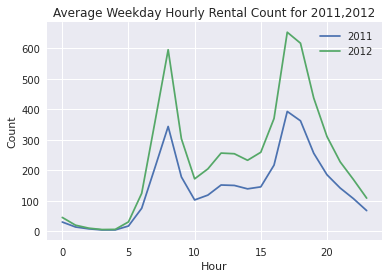

In [27]:
for year in year_hr_avg.index.levels[0]:
    plt.plot(year_hr_avg[year].index,year_hr_avg[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Weekday Hourly Rental Count for 2011,2012')
plt.show()

2011년도와 동일하게 주중에는 점심시간에 자전거 렌탈 수요가 감소하는 것을 확인할 수 있다. 

In [28]:
#주말 시간별 렌탈 횟수

year_hr_weekend = dat[dat['weekday'].isin([5,6])].groupby(['year','hour'])
year_hr_weekend_avg = year_hr_weekend['count'].mean()

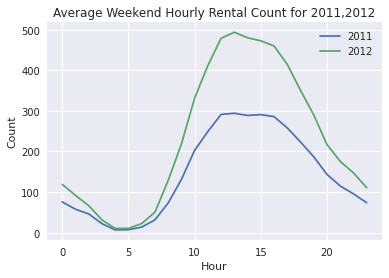

In [29]:
for year in year_hr_weekend_avg.index.levels[0]:
    plt.plot(year_hr_weekend_avg[year].index,year_hr_weekend_avg[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Weekend Hourly Rental Count for 2011,2012')
plt.show()

2011년도와 동일하게 2012년도에도 주말에는 점심시간과 상관 없이 수요가 낮 시간대로 갈수록 증가하는 경향이 나타나는 것을 확인할 수 있다. 


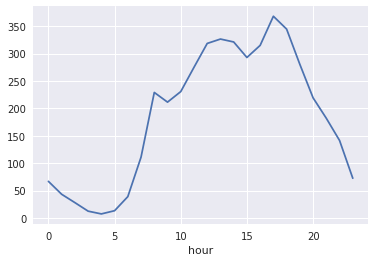

In [30]:
#휴일(holiday) 에서의 자전거 렌탈 횟수

holiday_hr = dat[dat['holiday'].isin([1])].groupby(['hour'])
holiday_hr_avg = holiday_hr['count'].mean()
holiday_hr_avg.plot()

휴일 동안의 자전거 렌탈 분포는 주말과 비슷한 경향을 보이기는 하지만 오전 8-9시와 오후 5-6시즘에 주중과 비슷한 경향을 보여 사람마다 휴일에 일의 유무에 따라 달라질 수도 있을 것이라 생각했다. 

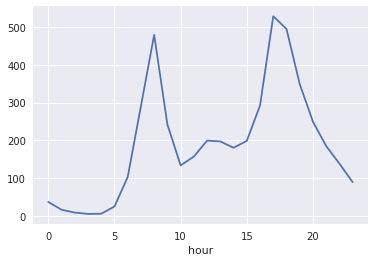

In [31]:
#근무일(workingday) 에서의 자전거 렌탈 횟수

work_hr = dat[dat['workingday'].isin([1])].groupby(['hour'])
work_hr_avg = work_hr['count'].mean()
work_hr_avg.plot()

근무일에는 시간대별 렌탈 횟수가 주중과 유사한 경향을 보이는 것을 확인할 수 있다.